# 3. The Knapsack Problem
### James Saslow
### 12/3/2023

The Knapsack problem states that given a bunch of items that have a certain weight and monetary value, which items should you grab to maximize profit under the constraint that you have a carrying capacity?

The image below visually outlines a specific example of the knapsack problem with a carrying capacity of $15 kg$. We will solve this specific example in our code.

Your gut feeling should be to select items that have a low weight, but high monetary value. This is the intuitive strategy to solving the knapsack problem.

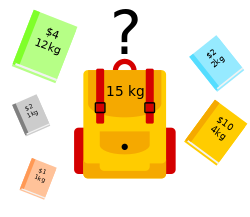

# Classical Methods for Solving the Knapsack Problem

First, let's attempt to solve the knapsack problem just using *classical* computing methods in Python. We will do this just by computing each permutation by brute force and selecting the option that gives the maximum profit under the carrying capacity constraint. We will use this result to validate DWave's answer. Of course, there are more elegant classical methods than just 'brute force' with classical computing, but for all practical purposes, the *quantum dream* is to solve these QUBO problems on hybrid classical - quantum solvers.

In [1]:
import numpy as np

In [2]:
# Defining the Knapsack problem

items = ['Lime', 'Gray', 'Orange', 'Blue', 'Gold'] # Encoding Items as positions in the array
weights = [12,1,1,2,4] # These aren't the weights of the QUBO, these are the weights of the object
value   = [4,2,1,2,10] # These are the monetary values of each object (weights of the QUBO)

num_items = len(items)

carrying_capacity = 15

In [3]:
# Function for generating Binary Bit Strings
def bin_gen(number, num_qubits):
    '''
    Converts base 10 to binary
    '''
    bin1 = bin(number)[2:]
    L = num_qubits - len(bin1)
    bin2 = L*'0' + bin1
    
    arr_string = list(bin2)
    arr = [int(x) for x in arr_string]
    
    return arr


# Printing the first few binary bit-strings
for i in range(7):
    print(bin_gen(i,num_items))
    print(' ')
    
print('...')

print([1,1,1,1,1])

[0, 0, 0, 0, 0]
 
[0, 0, 0, 0, 1]
 
[0, 0, 0, 1, 0]
 
[0, 0, 0, 1, 1]
 
[0, 0, 1, 0, 0]
 
[0, 0, 1, 0, 1]
 
[0, 0, 1, 1, 0]
 
...
[1, 1, 1, 1, 1]


We will dot product each binary bit string into the **value** array to see what total monetary value we gain and we will dot product each binary bit string into the **weight** array as well and check to make sure it doesn't exceed 15. If it does, we will omit it from our solution set.

In [4]:
bit_string_array  = []
value_array = []
weight_array = []

for i in range( int(2**num_items) ):
    bit_string   = bin_gen(i,num_items) # Generating a bit string
    total_value  = np.dot( bit_string, value) # Computing the value of all items in the knapsack
    total_weight = np.dot( bit_string, weights ) # Computing the total weight of all items in the knapsack
    
    # Printing all 2**5 = 32 options and checking if the satisfy the constraint
    print('Bit-String = ', bit_string)
    print('Total Value: ',bit_string, '.', value, '=', total_value)
    print('Total Weight: ',bit_string, '.', weights,'=', total_weight)
    if total_weight > carrying_capacity:
        print('Exceeds Carrying Capacity?: Yes')
    else:
        print('Exceeds Carrying Capacity?: No')
    print(' ')
    
    # Only Appending Valid Solutions that Satisfy the carrying capacity constraint
    if total_weight <= carrying_capacity:
        bit_string_array.append(bit_string)
        value_array.append(total_value)
        weight_array.append(total_weight)

Bit-String =  [0, 0, 0, 0, 0]
Total Value:  [0, 0, 0, 0, 0] . [4, 2, 1, 2, 10] = 0
Total Weight:  [0, 0, 0, 0, 0] . [12, 1, 1, 2, 4] = 0
Exceeds Carrying Capacity?: No
 
Bit-String =  [0, 0, 0, 0, 1]
Total Value:  [0, 0, 0, 0, 1] . [4, 2, 1, 2, 10] = 10
Total Weight:  [0, 0, 0, 0, 1] . [12, 1, 1, 2, 4] = 4
Exceeds Carrying Capacity?: No
 
Bit-String =  [0, 0, 0, 1, 0]
Total Value:  [0, 0, 0, 1, 0] . [4, 2, 1, 2, 10] = 2
Total Weight:  [0, 0, 0, 1, 0] . [12, 1, 1, 2, 4] = 2
Exceeds Carrying Capacity?: No
 
Bit-String =  [0, 0, 0, 1, 1]
Total Value:  [0, 0, 0, 1, 1] . [4, 2, 1, 2, 10] = 12
Total Weight:  [0, 0, 0, 1, 1] . [12, 1, 1, 2, 4] = 6
Exceeds Carrying Capacity?: No
 
Bit-String =  [0, 0, 1, 0, 0]
Total Value:  [0, 0, 1, 0, 0] . [4, 2, 1, 2, 10] = 1
Total Weight:  [0, 0, 1, 0, 0] . [12, 1, 1, 2, 4] = 1
Exceeds Carrying Capacity?: No
 
Bit-String =  [0, 0, 1, 0, 1]
Total Value:  [0, 0, 1, 0, 1] . [4, 2, 1, 2, 10] = 11
Total Weight:  [0, 0, 1, 0, 1] . [12, 1, 1, 2, 4] = 5
Exceeds Ca

In [5]:
opt_index = np.argmax(value_array) # Locating where the optimal (max) solution occurs in the data set

opt_bit_string = bit_string_array[opt_index]
opt_value      = value_array[opt_index]
opt_weight     = weight_array[opt_index]


print(items)
print('Optimal Binary Bit-String:', opt_bit_string)
print('Maximum Monetary Value:', opt_value)
print('Weight:',opt_weight, '. Satisfies Carrying Capacity Constraint?:', opt_weight <= carrying_capacity)

['Lime', 'Gray', 'Orange', 'Blue', 'Gold']
Optimal Binary Bit-String: [0, 1, 1, 1, 1]
Maximum Monetary Value: 15
Weight: 8 . Satisfies Carrying Capacity Constraint?: True


Our optimal binary bit string tells us which items to add to our knapsack, and which ones to leave behind. A '$0$' means do not take the item, and a '$1$' means to take the item.

The optimal binary bit string we classically solved for is $|01111>$. If we reference our **items** array: ['Lime', 'Gray', 'Orange', 'Blue', 'Gold'], the optimal bit string $|01111>$ tells us: Do not take the 'Lime' colored book, and take the rest of the books.

We can take the dot product between [0,1,1,1,1] and the *value* vector to get the total value of all items in the knapsack.

total value = $[0,1,1,1,1] \cdot [4,2,1,2,10] = 2 + 1 + 2 + 10 = 15$

Likewise, we can take the dot product between [0,1,1,1,1] and the *weights* vector to get the total weight of all the items in the knapsack

total weight = $[0,1,1,1,1] \cdot [12,1,1,2,4] = 1 + 1 + 2 + 4 = 8$

Notice, $8$ is less than the carrying capacity limit of $15$, thus the carrying capacity constraint is satisfied.

# Quantum Annealing Methods for Solving the Knapsack Problem

In [12]:
# Importing DWave Packages

from dwave.system import DWaveSampler, EmbeddingComposite
from dimod import BinaryQuadraticModel

In [13]:
# Setting up Parameters for the Knapsack Problem

items = np.arange(0,5).tolist() # Binary Variable Labeling

weights = [12,1,1,2,4] # These aren't the weights of the QUBO, these are the weights of the object
value   = [4,2,1,2,10] # These are the monetary values of each object (weights of the QUBO)

carrying_capacity = 15

# Encoding the color of each book
x = ['Lime', 'Gray', 'Orange', 'Blue', 'Gold'] # More Binary Variable Labeling

In [14]:
# Encoding the QUBO in DWave solvers

bqm = BinaryQuadraticModel("BINARY") # Encoding QUBO

# Writing the Objective Function (adding each variable and assigning it's associated monetary value (QUBO weight))
for i in items:
    bqm.add_variable(x[i], -value[i]) # Appending the negative of each value so the solver looks for the minimum

# Accumulating the linear inequality constraints
c1 = [(x[i], weights[i]) for i in items]

# Implementing all the constraints all together
bqm.add_linear_inequality_constraint(c1, lb = 1, ub = carrying_capacity, lagrange_multiplier = 2, label = 'constraint')
    
    
bqm

BinaryQuadraticModel({'Lime': -436.0, 'Gray': -60.0, 'Orange': -59.0, 'Blue': -114.0, 'Gold': -218.0, 'slack_constraint_0': -58.0, 'slack_constraint_1': -112.0, 'slack_constraint_2': -208.0, 'slack_constraint_3': -322.0}, {('Gray', 'Lime'): 48.0, ('Orange', 'Lime'): 48.0, ('Orange', 'Gray'): 4.0, ('Blue', 'Lime'): 96.0, ('Blue', 'Gray'): 8.0, ('Blue', 'Orange'): 8.0, ('Gold', 'Lime'): 192.0, ('Gold', 'Gray'): 16.0, ('Gold', 'Orange'): 16.0, ('Gold', 'Blue'): 32.0, ('slack_constraint_0', 'Lime'): 48.0, ('slack_constraint_0', 'Gray'): 4.0, ('slack_constraint_0', 'Orange'): 4.0, ('slack_constraint_0', 'Blue'): 8.0, ('slack_constraint_0', 'Gold'): 16.0, ('slack_constraint_1', 'Lime'): 96.0, ('slack_constraint_1', 'Gray'): 8.0, ('slack_constraint_1', 'Orange'): 8.0, ('slack_constraint_1', 'Blue'): 16.0, ('slack_constraint_1', 'Gold'): 32.0, ('slack_constraint_1', 'slack_constraint_0'): 8.0, ('slack_constraint_2', 'Lime'): 192.0, ('slack_constraint_2', 'Gray'): 16.0, ('slack_constraint_2', '

In [15]:
# Solve the problem using D-Wave
sampler = EmbeddingComposite(DWaveSampler())
sampleset = sampler.sample(bqm, num_reads=50)

In [16]:
# Post-Processing Solver Output
opt_solution = sampleset.first.sample # Binary Bit-String that minimizes the cost function
opt_value = sampleset.first.energy    # Minimized Cost function value

In [17]:
print('X_min = ', opt_solution)
print('C_min = ', opt_value)

X_min =  {'Blue': 1, 'Gold': 1, 'Gray': 1, 'Lime': 0, 'Orange': 1, 'slack_constraint_0': 0, 'slack_constraint_1': 0, 'slack_constraint_2': 0, 'slack_constraint_3': 1}
C_min =  -15.0


The DWave Solver tells gives us a summary of which books to add to our knapsack by marking them with a '$1$', and which books not to grab by marking them with a '$0$'.

In this case, we have: 

### {'Blue': 1, 'Gold': 1, 'Gray': 1, 'Lime': 0, 'Orange': 1}

Which means to add every book to our knapsack except the lime book in order to maximize our profit while staying underneath our carrying capacity constraint.

Next, we will upgrade from *LUBOs* to *QUBOs* by adding the 'quadraticness' back into the cost function. However, it is quite significant to see that LUBO's by themselves can solve interesting real-world problems. It turns out, the problems get more interesting and more complex as we examine QUBOs! Stay tuned!

### Sources

[1] “0/1 Knapsack problem,” GeeksforGeeks, https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/ (accessed Dec. 11, 2023). 

[2] “Dynamic programming - subset sum problem,” GeeksforGeeks, https://www.geeksforgeeks.org/subset-sum-problem-dp-25/ (accessed Dec. 11, 2023). 

[3] “Binary quadratic models#,” Binary Quadratic Models - Ocean Documentation 6.7.1 documentation, https://docs.ocean.dwavesys.com/en/stable/concepts/bqm.html (accessed Dec. 11, 2023). 

[4] “Quantum programming tutorial | D-wave qubits 2021,” YouTube, https://www.youtube.com/watch?v=jTDnGox0c9Y (accessed Dec. 11, 2023). 